# Pandas challenges

Read the `veahicles.csv` dataframe and store it in a variable called `cars`:

In [1]:
# code here
import pandas as pd
cars = pd.read_csv('data/vehicles.csv')

# Explore the dataset:

How many rows and columns are there?

In [2]:

print(f"number of rows is {cars.shape[0]}\nnumber of column is {cars.shape[1]}")

number of rows is 35952
number of column is 15


What are the data types of the columns?

In [3]:

print(cars.dtypes)


Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object


Are there missing values?

In [4]:

cars.isna().sum()

Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64

What are the ranges / distributions of the numerical columns?

In [5]:

cars.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


What are the value counts for the categorical columns?


In [6]:
cars.dtypes[cars.dtypes=='object']

Make             object
Model            object
Transmission     object
Drivetrain       object
Vehicle Class    object
Fuel Type        object
dtype: object

<AxesSubplot:>

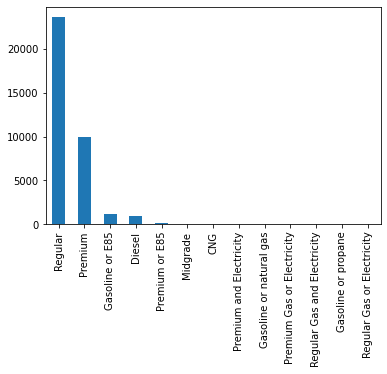

In [7]:
cars['Fuel Type'].value_counts().plot(kind='bar')

In [8]:
cat_col_data = cars[cars.dtypes[cars.dtypes == 'object'].index]
cat_col_data.describe()

,Make,Model,Transmission,Drivetrain,Vehicle Class,Fuel Type
count,35952,35952,35952,35952,35952,35952
unique,127,3608,45,8,34,13
top,Chevrolet,F150 Pickup 2WD,Automatic 4-spd,Front-Wheel Drive,Compact Cars,Regular
freq,3643,197,10585,13044,5185,23587


In [9]:

# code here
cars_cp = cars.copy()


Drop the column "Combined MPG"

In [10]:
cars_cp.drop('Combined MPG', axis=1,inplace=True)

In [11]:
cars_cp.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,683.615385,2550


Change column names so that there are no names with spaces or weird special characters:

In [12]:
cars_cp.columns = [col.replace(" ","_").replace("/","_per_").lower() for col in cars_cp.columns]
cars_cp.head(2)

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_per_year,city_mpg,highway_mpg,co2_emission_grams_per_mile,fuel_cost_per_year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,683.615385,2550


What brand has the most cars?

In [13]:
cars_cp['make'].value_counts().sort_values(ascending=False)[0:1]

Chevrolet    3643
Name: make, dtype: int64

What brand has the worse CO2 Emissions on average?

In [14]:
cars_cp_brand = cars_cp.groupby(['make']).mean()
cars_cp_brand['co2_emission_grams_per_mile'].sort_values(ascending=False)[0:3]

make
Vector                                1049.159722
Superior Coaches Div E.p. Dutton       888.700000
S and S Coach Company  E.p. Dutton     888.700000
Name: co2_emission_grams_per_mile, dtype: float64

Which brands are more environment friendly?

In [15]:
cars_cp_brand['co2_emission_grams_per_mile'].sort_values(ascending=True)[0:3]

make
Fisker    169.000000
smart     247.030556
Fiat      304.666560
Name: co2_emission_grams_per_mile, dtype: float64

Create 4 groups (bins) of cars, by Year. We want to explore how cars have evolved decade by decade.

In [16]:
cars_cp['year'].describe()

count    35952.00000
mean      2000.71640
std         10.08529
min       1984.00000
25%       1991.00000
50%       2001.00000
75%       2010.00000
max       2017.00000
Name: year, dtype: float64

In [17]:
def cat_decade(year):
    if year < 1990:return 'first'
    elif 1990 < year <= 2000: return 'second'
    elif 2000 < year <=2010: return 'third'
    elif 2010 < year <=2017: return 'four'
    else: return None

In [18]:
cars_cp['decade'] = cars_cp['year'].map(cat_decade)

Did cars consume more gas in the eighties?

<AxesSubplot:xlabel='decade'>

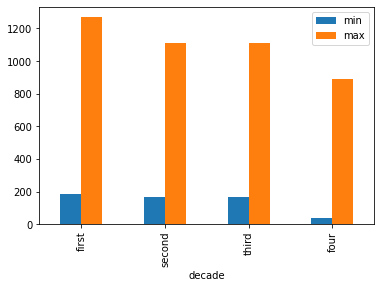

In [19]:
decade_cat = cars_cp.groupby('decade')
decade_cat.describe()
decade_cat.describe()['co2_emission_grams_per_mile'].loc[['first','second','third','four'],['min','max']].plot(kind='bar')

Do cars with automatic transmission consume more fuel than cars with manual transmission?

In [20]:
automic_df = cars_cp[cars_cp['transmission'].str.match('Automatic.*')][["city_mpg", "highway_mpg"]]
automic_df.mean()

city_mpg       16.954503
highway_mpg    23.058570
dtype: float64

In [21]:
manual_df = cars_cp[cars_cp['transmission'].str.match('Manual.*')][["city_mpg", "highway_mpg"]]
manual_df.mean()

city_mpg       18.742754
highway_mpg    25.204425
dtype: float64

Group cars by fuel type and aggregate them by the following criteria: 

- The maximum number cylinders
- The oldest year
- The average Miles Per Gallon in the city

In [22]:
# code here
cars_cp_group = cars_cp.groupby('fuel_type').aggregate({'cylinders': 'max',
                                     'year': 'min',
                                     'city_mpg':'mean'})
cars_cp_group

,cylinders,year,city_mpg
fuel_type,,,
CNG,8.0,1993,15.966667
Diesel,10.0,1984,21.173436
Gasoline or E85,8.0,2000,15.347280
Gasoline or natural gas,8.0,2000,13.700000
Gasoline or propane,8.0,2001,12.000000
Midgrade,8.0,2011,14.851351
Premium,16.0,1985,16.793166
Premium Gas or Electricity,8.0,2011,30.705882
Premium and Electricity,8.0,2014,24.900000


We want to use "Drivetrain" in a statistical model. Convert the column to numeric.

In [23]:
# code here
cars_cp.drivetrain.unique()


array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', '4-Wheel Drive',
       'Part-time 4-Wheel Drive', '2-Wheel Drive, Front'], dtype=object)

In [24]:
numeric_drivetrain= {'2-Wheel Drive': 0, 'Rear-Wheel Drive': 1, 'Front-Wheel Drive': 2,
       '4-Wheel or All-Wheel Drive': 3, 'All-Wheel Drive': 4, '4-Wheel Drive': 5,
       'Part-time 4-Wheel Drive': 6, '2-Wheel Drive, Front': 6}

cars_cp['drivetrain'] = cars_cp['drivetrain'].map(numeric_drivetrain)


In [27]:
cars_cp.head(3)

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_per_year,city_mpg,highway_mpg,co2_emission_grams_per_mile,fuel_cost_per_year,decade
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,0,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,522.764706,1950,first
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,0,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,683.615385,2550,first
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,1,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,555.437500,2100,first


Read the `car_brands.csv` data:

In [76]:
# code here
car_brands = pd.read_csv('data/car_brands.csv')
car_brands.head(3)

,brand,revenue,production
0,AM General,1537,1.002916
1,ASC Incorporated,232,1.628105
2,Acura,234,3.394481


In [77]:
cars_cp.head(2)

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_per_year,city_mpg,highway_mpg,co2_emission_grams_per_mile,fuel_cost_per_year,decade
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,0,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,522.764706,1950,first
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,0,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,683.615385,2550,first


Join the cars dataframe with the car brands dataframe.

In [78]:
cars_with_brands = cars_cp.merge(right=car_brands,
                                how="left",
                                left_on="make",
                                right_on="brand")

In [79]:
cars_with_brands.head(2)

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_per_year,city_mpg,highway_mpg,co2_emission_grams_per_mile,fuel_cost_per_year,decade,brand,revenue,production
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,0,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,522.764706,1950,first,AM General,1537,1.002916
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,0,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,683.615385,2550,first,AM General,1537,1.002916


Which brands have the most revenue?

In [81]:
car_brands.groupby('brand').agg({'revenue':'sum'}).sort_values(by='revenue',ascending=False)

,revenue
brand,
Geo,1988
Volga Associated Automobile,1965
Goldacre,1958
Ferrari,1946
CX Automotive,1935
...,...
Lotus,45
Cadillac,42
Pontiac,31
